# Loan Prediction

## Logitic Regression

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
dirpath = 'C:/Users/ankit.bhatia/Documents/GitHub/PythonScripts/data/'

In [10]:
# Importing the dataset
dataset = pd.read_csv(dirpath+'train.csv')
dataset.head()
# Data Filtering (females who are not graduate and got a loan) & Column Filtering(Limited no of columns)
#dataset.loc[(df['Gender']=='Female') & (df['Education']=='Not Graduate') & (df['Loan_Status']=='Y'),
 #      ['Gender','Education','Loan_Status','LoanAmount']]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
# Summary of Numerical Variables
#dataset.describe()

# Exploring dependency on non-numeric columns
#dataset['Property_Area'].value_counts()

# Number of Missing values in each column
#axis=0/1 defines that function is to be applied on each column/row
dataset.isnull().sum()
#dataset.apply(lambda x: sum(x.isnull()),axis =0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Impute Missing Values with mode in categorical columns
from scipy.stats import mode
#dataset['Gender'].mode()
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [13]:
# Impute Missing Values with mean in numerical columns
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean(),inplace=True)

In [14]:
# Identifying Independent & dependent variables
X = dataset.loc[:, ['ApplicantIncome']].values
#X = dataset.loc[:, ['ApplicantIncome', 'CoapplicantIncome','Credit_History','Gender','Dependents']].values
y = dataset.loc[:, ['Loan_Status']].values



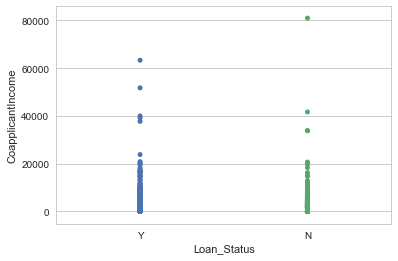

In [15]:
# Relation between ApplicatntIncome & Loan Status
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="Loan_Status", y="ApplicantIncome", data=dataset);
sns.stripplot(x="Loan_Status", y="CoapplicantIncome", data=dataset);


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  42]
 [  0 112]]


In [21]:
print (accuracy_score(y_test, y_pred))

0.727272727273
